In [1]:
import numpy as np
import cv2
import os

In [2]:
randomByteArray = bytearray(os.urandom(120000))
flatNumpyArray = np.array(randomByteArray)
# Convert the array to make a 400x300 grayscale image.
grayImage = flatNumpyArray.reshape(300, 400)
bgrImage = flatNumpyArray.reshape(100, 400, 3)

In [10]:
len(grayImage[:3][0])
grayImage[:3][0][1]

143

In [11]:
len(bgrImage[:3][0])
bgrImage[:3][0][1]

array([ 82,  49, 191], dtype=uint8)

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html

## Write an image

In [16]:
cv2.imwrite('grayImage.png',grayImage)

True

In [17]:
cv2.imwrite('bgrImage.png',bgrImage)

True

## Read an image

In [32]:
img = cv2.imread('grayImage.png',0)
#second argument
# cv2.IMREAD_COLOR : Loads a color image. Any transparency of image will be neglected. It is the default flag.
# cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode
# cv2.IMREAD_UNCHANGED

## Display an image

In [33]:
cv2.imshow('bgrImage',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## ALL 

In [36]:
img =cv2.imread("bgrImage.png",cv2.IMREAD_GRAYSCALE)
cv2.imshow('image',img)
k = cv2.waitKey(0)
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()
elif k == ord('s'): # wait for 's' key to save and exit
    cv2.imwrite('bgrImageGray.png',img)
    cv2.destroyAllWindows()

## MATPLOTLIB

In [13]:
import matplotlib.pyplot as plt

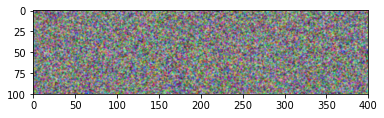

In [46]:
img=cv2.imread("bgrImage.png",cv2.IMREAD_UNCHANGED)
# img=cv2.imread("bgrImage.png",0)
plt.imshow(img,interpolation="bicubic")
# plt.imshow(img)
plt.show()

Text(0.5,1,'image en niveau de gris')

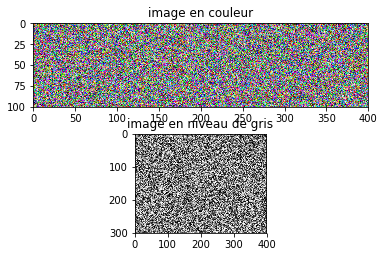

In [14]:
plt.figure
plt.subplot(2,1,1)
plt.imshow(bgrImage)
plt.title('image en couleur')
plt.subplot(2,1,2)
plt.imshow(grayImage,cmap="gray") #attention il y a quelque chose à ajouter !
plt.title('image en niveau de gris')

In [58]:
print("Intensité gray Image", grayImage[50,50])
print("BGR color",bgrImage[50,50])

Intensité gray Image 156
BGR color [ 89 104 254]


### Splitting and Merging Image Channels

In [ ]:
B,G,R channels of an image can be split to their individual planes when needed.

In [59]:
b,g,r = cv2.split(bgrImage) # Pour b: comme si on prenait la première colonne de chaque élément ==> bgrImage[:,:,0]

In [63]:
bgrImage[:2]

array([[[181, 131, 161],
        [ 89,  77, 149],
        [ 35,  78, 211],
        ...,
        [ 72, 244, 116],
        [ 61, 183, 103],
        [114, 113,  82]],

       [[153, 143, 212],
        [144, 176, 122],
        [163, 200,   1],
        ...,
        [248, 177, 162],
        [ 30, 199, 220],
        [ 18,  27, 253]]], dtype=uint8)

In [68]:
bgrImage[:,:,0]

array([[181,  89,  35, ...,  72,  61, 114],
       [153, 144, 163, ..., 248,  30,  18],
       [ 74, 172,  28, ...,   7,  44,  49],
       ...,
       [152, 211, 209, ..., 178, 137,  82],
       [ 58, 252,  49, ..., 212, 225, 204],
       [162,  50,  43, ..., 167, 111, 101]], dtype=uint8)

if we want to put all red pixels to 0:

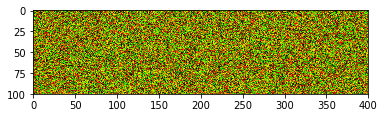

In [70]:
bgrImage[:,:,2]=0
plt.imshow(bgrImage)

# Arithmetic oprations on images

### Image Blending ==> transparent effect

Adding two images with different weights

In [78]:
img1 = cv2.imread('ml.png')
img2 = cv2.imread('opencv_logo.jpg')

dst = cv2.addWeighted(img1,0.7,img2,0.3,0)

cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Bitwise operations

 They will be highly useful while extracting any part of the image (as we will see in coming chapters), defining and working with non-rectangular ROI etc

For example, put a logo abose an image without having opaque or blinding effect

==> ça ne marche pas

In [81]:
# Load two images
img1 = cv2.imread('ml.png')
img2 = cv2.imread('opencv_logo.jpg')


# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

cv2.imshow('img1_bg',img1_bg)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

cv2.imshow('img2_fg',img2_fg)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()